<a href="https://colab.research.google.com/github/poer1tonie/Portofolio-Short-Class-Data-Science-by-MySkillxLionParcel/blob/main/Portofolio_Short_Class_Data_Science_by_MySkillxLionParcel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Import libraries
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Data read
data = pd.read_csv('diabetes.csv', sep= ',')
display(data)
data.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# Check count data is null
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# Data preparation
data_x = data.drop('Outcome', axis=1)
display(data_x)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
# Data preparation
data_y = data['Outcome']
display(data_y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
# Model training
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
end = time.time()
print(f"Model training completed in {end-start}")

Model training completed in 0.008994340896606445


In [19]:
# Model evaluating
accuracy = model.score(X_test, y_test)
print(accuracy)


0.6889763779527559


In [24]:
# Confusion matrix model
y_pred = model.predict(X_test)
confusion_result = confusion_matrix(y_test, y_pred)
print(confusion_result)

[[127  32]
 [ 47  48]]


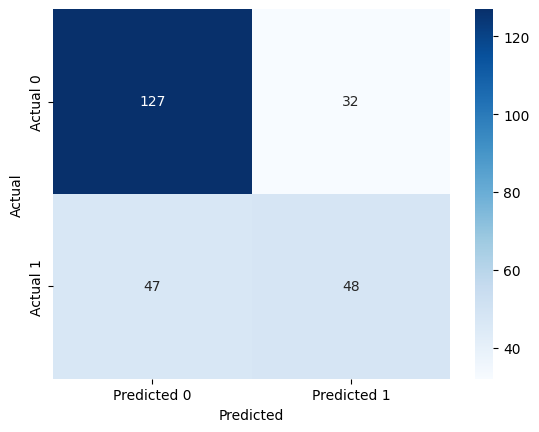

In [30]:
# Example predictions and test labels
y_pred = model.predict(X_test)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the blueprint
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
# New Data Prediction
new_data = pd.DataFrame({
  'Pregnancies':[6],
  'Glucose':[148],
  'BloodPressure':[72],
  'SkinThickness':[35],
  'Insulin':[0],
  'BMI':[33.6],
  'DiabetesPedigreeFunction':[0.627],
  'Age':[40]
})
display(new_data)

new_predict = model.predict(new_data)
display(new_predict)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,40


array([0])